In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

# Week 1

# Data

In [2]:
Amat = np.array([
    [22.13831203, 0.16279204, 0.02353879, 0.02507880,-0.02243145,-0.02951967,-0.02401863],
    [0.16279204, 29.41831006, 0.02191543,-0.06341569, 0.02192010, 0.03284020, 0.03014052],
    [0.02353879,  0.02191543, 1.60947260,-0.01788177, 0.07075279, 0.03659182, 0.06105488],
    [0.02507880, -0.06341569,-0.01788177, 9.36187184,-0.07751218, 0.00541094,-0.10660903],
    [-0.02243145, 0.02192010, 0.07075279,-0.07751218, 0.71033323, 0.10958126, 0.12061597],
    [-0.02951967, 0.03284020, 0.03659182, 0.00541094, 0.10958126, 8.38326265, 0.06673979],
    [-0.02401863, 0.03014052, 0.06105488,-0.10660903, 0.12061597, 0.06673979, 1.15733569]]);

Bmat = np.array([
    [-0.03423002, 0.09822473,-0.00832308,-0.02524951,-0.00015116, 0.05321264, 0.01834117],
    [ 0.09822473,-0.51929354,-0.02050445, 0.10769768,-0.02394699,-0.04550922,-0.02907560],
    [-0.00832308,-0.02050445,-0.11285991, 0.04843759,-0.06732213,-0.08106876,-0.13042524],
    [-0.02524951, 0.10769768, 0.04843759,-0.10760461, 0.09008724, 0.05284246, 0.10728227],
    [-0.00015116,-0.02394699,-0.06732213, 0.09008724,-0.07596617,-0.02290627,-0.12421902],
    [ 0.05321264,-0.04550922,-0.08106876, 0.05284246,-0.02290627,-0.07399581,-0.07509467],
    [ 0.01834117,-0.02907560,-0.13042524, 0.10728227,-0.12421902,-0.07509467,-0.16777868]]);

yvec= np.array([-0.05677315,-0.00902581, 0.16002152, 0.07001784, 0.67801388,-0.10904168, 0.90505180]);

E_mat = np.block([[Amat, Bmat], [Bmat, Amat]])  #construct matrix E
S_mat = np.block([[np.identity(len(Amat)), np.zeros(Amat.shape)], [np.zeros(Amat.shape), -np.identity(len(Amat))]])  #construct matrix S
z_vec = np.block([yvec, -yvec])  #construct vector z

# Problem a

## 1)

In [3]:
def norm(M):
    """This function takes a matrix M and calculates the max norm of matrix M"""
    norm_M = np.max(np.sum(np.abs(M), axis=1))
    
    return norm_M

def condition_number(M):
    """This funtion takes a matrix M and returns the condition number of matrix M"""
    invM = np.linalg.inv(M)
    
    cond = norm(M) * norm(invM)
    
    return cond

## 2)

In [4]:
omega = np.array([0.800, 1.146, 1.400])  #frequencies

#calculate condition number for each frequency
cond_numbers = []

for i in range(len(omega)):
    cond_i = condition_number(E_mat-omega[i]*S_mat)
    cond_numbers.append(cond_i)

print("Condition number for omega = 0.800:", np.round(cond_numbers[0], 2))
print("Condition number for omega = 1.146:", np.round(cond_numbers[1], 2))
print("Condition number for omega = 1.400:", np.round(cond_numbers[2], 2))

Condition number for omega = 0.800: 327.82
Condition number for omega = 1.146: 152679.27
Condition number for omega = 1.400: 227.19


In [5]:
#number of significant digets in x is given by the number of significant digets in z minus log(condition number)

print("Signiticant digets in x for omega = 0.800:", np.round(8-np.log10(cond_numbers[0]), 1))
print("Signiticant digets in x for omega = 1.146:", np.round(8-np.log10(cond_numbers[1]), 1))
print("Signiticant digets in x for omega = 1.400:", np.round(8-np.log10(cond_numbers[2]), 1))

Signiticant digets in x for omega = 0.800: 5.5
Signiticant digets in x for omega = 1.146: 2.8
Signiticant digets in x for omega = 1.400: 5.6


# Problem b

## 1)

In [6]:
del_omega = 1/2 * 10**(-3)  #perturbation in frequency

#calculate bound on relative forward error
rel_forward_err = []

for i in range(len(omega)):
    rel_forward_err_i = condition_number(E_mat-omega[i]*S_mat) * norm(del_omega*S_mat) / norm(E_mat-omega[i]*S_mat)
    rel_forward_err.append(rel_forward_err_i)

print("Bound on the relative forward error for omega = 0.800:", np.round(rel_forward_err[0], 4))
print("Bound on the relative forward error for omega = 1.146:", np.round(rel_forward_err[1], 4))
print("Bound on the relative forward error for omega = 1.400:", np.round(rel_forward_err[2], 4))

Bound on the relative forward error for omega = 0.800: 0.0052
Bound on the relative forward error for omega = 1.146: 2.405
Bound on the relative forward error for omega = 1.400: 0.0036


## 2)

In [7]:
#the number of significant digets in x is given by -log(relative forward error)

print("Signiticant digets in x for omega = 0.800:", np.round(-np.log10(rel_forward_err[0]), 1))
print("Signiticant digets in x for omega = 1.146:", np.round(-np.log10(rel_forward_err[1]), 2))
print("Signiticant digets in x for omega = 1.400:", np.round(-np.log10(rel_forward_err[2]), 1))

Signiticant digets in x for omega = 0.800: 2.3
Signiticant digets in x for omega = 1.146: -0.38
Signiticant digets in x for omega = 1.400: 2.4


# Problem c

## 1)

In [8]:
def LU_factorize(M):
    """This function takes a square matrix M and returns the LU-decomposition of matrix M where L is the lower triangular matrix and U is the upper triangular matrix"""
    
    U = M  #initialize U
    L = np.identity(len(M))  #initialize L

    for k in range(len(M)-1): #loop over all columns except the last
        if U[k,k] == 0:
            print("pivot is zero")
            break  #stop if pivot is zero
            
        m_i = np.identity(len(M))  #initialize intermediate matrix to be multiplied onto U from the left
        l_i = np.identity(len(M))  #initialize intermediate matrix to be multiplied onto L from the right
        
        for i in range(k+1, len(M)):  #loop over all rows in column k below the pivot
            m_i[i,k] = - U[i,k] / U[k,k]
            l_i[i,k] = - m_i[i,k]
        
        U = np.matmul(m_i,U)  #multiply m_i onto U from the left to construct U
        L = np.matmul(L,l_i)  #multiply l_i onto L from the right to construct L
    
    return L, U

In [9]:
#the function is tested with matrix A

A = np.array([[2,1,1],[4,1,4],[-6,-5,3]])

L, U = LU_factorize(A)

print(np.matmul(L,U))  #check if LU-factorization is correct, hence if LU=A

[[ 2.  1.  1.]
 [ 4.  1.  4.]
 [-6. -5.  3.]]


## 2)

In [10]:
def forward_substitute(L, b):
    """This function takes a square lower triangular matrix L and a vector b and returns the solution vector y to the system Ly=b"""
    
    b = np.copy(b)  #initialize b
    y = np.zeros(len(L))  #initialize solution y
    
    for j in range(len(L)):  #loop over all columns in L
        if L[j,j] == 0:
            print("matrix is singular")
            break  #stop if the matrix is singular
            
        y[j] = b[j]/L[j,j]  #calculate the j-component of the solution
        
        for i in range(j+1, len(L)):  #loop over all rows in L below L[j,j]
            b[i] = b[i] - L[i,j] * y[j]  #update b
    
    return y

In [11]:
def back_substitute(U,y):
    """This function takes a square upper triangular matrix U and a vector y and returns the solution vector x to the system Ux=y"""
    
    y = np.copy(y)  #initialize y
    x = np.zeros(len(U))  #initialize solution x

    for j in range(len(U)-1,-1,-1):  #loop backwards over columns in U
        if U[j,j] == 0:
            print("matrix is singular")
            break  #stop if the matrix is singular
        
        x[j] = y[j] / U[j,j]  #calculate the j-component of the solution
        
        for i in range(j):  #loop over the j first rows in U
            y[i] = y[i] - U[i,j] * x[j]  #update y
    
    return x

In [12]:
#the whole routine is testet with the system Ax=b

A = np.array([[2,1,1],[4,1,4],[-6,-5,3]])
b = np.array([4,11,4])

L, U = LU_factorize(A)
y = forward_substitute(L, b)
x = back_substitute(U,y)

print("My routine gives the solution x=",x)  #the solution from my routine
print("A library routine gives the solution x=", np.linalg.solve(A, b))  #the solution from a library routine

My routine gives the solution x= [-4.  7.  5.]
A library routine gives the solution x= [-4.  7.  5.]


# Problem d

In [13]:
def solve_alpha(freq, z=z_vec, E=E_mat, S=S_mat):
    """This function takes a frequency and returns the frequency dependent polarizability alpha for that frequency as well as x (needed to calculate bound)"""
    
    #to find alpha, the system (E-omega*S)x=z is solved for x using my routines from the previous problem
    L, U = LU_factorize(E-freq*S)
    y = forward_substitute(L, z)
    x = back_substitute(U,y)
    
    alpha = np.dot(z, x)  #alpha is then given by z dot x
    
    return alpha, x

def alpha_array(freq):
    """This function takes an array of frequencies and returns an array with polarizability as a function of frequency"""

    alpha_array = np.zeros(len(freq))  #initialize array for values of the polarizability for each frequency

    for i in range(len(freq)):  #calculate polarizability for each frequency
        alpha_array[i] = solve_alpha(freq[i])[0]
    
    return alpha_array

## 1)

In [14]:
omega = np.array([0.800, 1.146, 1.400])  #array of frequencies
del_omega = 1/2 * 10**(-3)  #frequency perturbation

#solve for alpha using the function above for each of the values of omega with and without perturbations
alpha = alpha_array(omega)  #omega
alpha_minus = alpha_array(omega - del_omega)  #omega - del_omega
alpha_plus = alpha_array(omega + del_omega)   #omega + del_omega

#print values of alpha
print("omega =", omega, "\n")
print("alpha(omega) =", np.round(alpha, 3))
print("alpha(omega + del_omega) =", np.round(alpha_plus, 3))
print("alpha(omega - del_omega) =", np.round(alpha_minus, 3), "\n")

#print calculated Dalpha = abs(alpha(omega + domega) - alpha)
print("Delta alpha =", np.round(np.abs(alpha_plus-alpha), 5))

omega = [0.8   1.146 1.4  ] 

alpha(omega) = [ 1.636000e+00  2.609235e+03 -2.707000e+00]
alpha(omega + del_omega) = [ 1.644000e+00 -4.185018e+03 -2.700000e+00]
alpha(omega - del_omega) = [  1.628 994.753  -2.714] 

Delta alpha = [8.29000000e-03 6.79425361e+03 6.97000000e-03]


## 3)

In [15]:
omega = np.array([0.800, 1.146, 1.400])  #array of frequencies
del_omega = 1/2 * 10**(-3)  #frequency perturbation

#calculate upper bound for Delta alpha
D_alpha_bound = []

for i in range(len(omega)):
    D_alpha_bound_i = np.max(np.abs(np.transpose(z_vec))) * np.max(np.abs(solve_alpha(omega[i])[1])) * condition_number(E_mat-omega[i]*S_mat) * norm(del_omega*S_mat) / norm(E_mat-omega[i]*S_mat)
    D_alpha_bound.append(D_alpha_bound_i)
    
print("omega =", omega, "\n")
print("Bound on Delta alpha =", np.round(D_alpha_bound, 5))  #print bound on Delta alpha for each frequency

omega = [0.8   1.146 1.4  ] 

Bound on Delta alpha = [1.50000000e-02 6.18733026e+03 1.04200000e-02]


# Problem e

## 1)

Text(0.5, 1.0, 'Polarizability as a function of frequency')

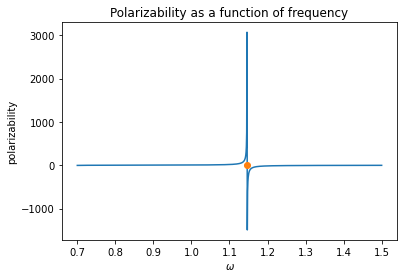

In [16]:
omega = np.linspace(0.7, 1.5, 1000)  #array of 1000 evenly spaced values of omega from 0.7 to 1.5

plt.plot(omega, alpha_array(omega))  #plot polarizability as a function of frequency
plt.plot(1.146307999, 0, "o")  #create dot at point of singularity
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Polarizability as a function of frequency")

# Week 2

# Data

In [17]:
A0 = np.array([[1,2],[3,4]], dtype = float)
A1 = np.array([[1,2],[3,4],[5,6]], dtype = float)
A2 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], dtype = float)

b0 = np.array([1,2], dtype = float)
b1 = np.array([1,2,3], dtype = float)
b2 = np.array([1,2,3,4], dtype = float)

x0 = np.array([-0. ,  0.5], dtype = float)
x1 = np.array([-0. ,  0.5], dtype = float)
x2 = np.array([-0.33333333,  0.66666667,  0.        ], dtype = float)

# Problem f

In [18]:
def householder_QR_slow(A):
    """This function takes a m x n matrix M and uses the Householder method to compute the QR decomposition. It returns an m x m matrix Q, an m x n matrix R without zero-rows removed (R) and an n x n matrix R with zero-rows removed (R_square). This function explicitly computes and stores Q."""
    
    R = np.copy(A)  #initialize R
    Q = np.identity(np.max(np.shape(A)))  #initialize Q
    
    for i in range(np.min(np.shape(A))):  #loop over columns
        e = np.zeros(np.max(np.shape(A)))  #create e_i-vector
        e[i] = 1
        
        a_i = np.copy(R[:,i])  #make a copy of the i'th column in R
        a_i[:i] = 0  #set all indices above i to zero
        
        v_i = a_i - np.copysign(np.linalg.norm(a_i) * e, -a_i[0])  #compute vector v for the i'th column
        
        if np.dot(v_i,v_i) == 0:  #skip current column if it is already zero
            continue
        
        H_i = np.identity(len(v_i)) - 2 * np.outer(v_i,v_i) / np.dot(v_i,v_i)  #compute Householder matrix for the i'th column
    
        Q = np.matmul(Q, H_i)  #update Q by multiplying with H_i from the right    
        R = np.matmul(H_i, R)  #update R by multiplying with H_i from the left
        
    R_square = R[:np.min(np.shape(A)),:]  #remove bottom rows that are zero
    
    return Q, R, R_square

In [19]:
#test function with example 3.8 in Heath
Aex = np.array([[1, 0, 0], [0, 1, 0],  [0,0,1], [-1, 1, 0], [-1, 0, 1], [0, -1, 1]], dtype = float)

Q, R, R_square = householder_QR_slow(Aex)

print(np.round(R_square, 3), "\n")  #print resulting R matrix to 3 digit accurarry

print(np.round(np.matmul(Q, np.transpose(Q)), 3), "\n")  #print Q * Q_transpose (should equal identity matrix)
print(np.round(np.matmul(np.transpose(Q), Q), 3), "\n")  #print Q_transpose * Q (should equal identity matrix)

print(np.round(np.matmul(Q,R), 3))  #print Q*R (should equal Aex)

[[-1.732  0.577  0.577]
 [-0.    -1.633  0.816]
 [-0.    -0.    -1.414]] 

[[ 1.  0. -0. -0. -0. -0.]
 [ 0.  1.  0.  0. -0. -0.]
 [-0.  0.  1. -0. -0.  0.]
 [-0.  0. -0.  1.  0. -0.]
 [-0. -0. -0.  0.  1.  0.]
 [-0. -0.  0. -0.  0.  1.]] 

[[ 1.  0.  0. -0. -0.  0.]
 [ 0.  1.  0.  0. -0. -0.]
 [ 0.  0.  1. -0.  0. -0.]
 [-0.  0. -0.  1.  0. -0.]
 [-0. -0.  0.  0.  1.  0.]
 [ 0. -0. -0. -0.  0.  1.]] 

[[ 1. -0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]
 [-1.  1.  0.]
 [-1.  0.  1.]
 [-0. -1.  1.]]


In [20]:
#test function with matrix A1

Q, R, R_square = householder_QR_slow(A1)

print(np.round(R_square, 3), "\n")  #print resulting R matrix rounded to 3 diget accuracy

print(np.round(np.matmul(Q, np.transpose(Q)), 3), "\n")  #print Q * Q_transpose (should equal identity matrix)
print(np.round(np.matmul(np.transpose(Q), Q), 3), "\n")  #print Q_transpose * Q (should equal identity matrix)

print(np.round(np.matmul(Q,R), 3))  #print Q*R (should equal A1)

[[-5.916 -7.437]
 [ 0.    -0.828]] 

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]] 

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]] 

[[1. 2.]
 [3. 4.]
 [5. 6.]]


## 2)

In [21]:
def householder_fast(A):
    """This function takes a m x n matrix A and uses the Householder method to compute the upper triangular n x n matrix R and stores the reflection vectors v"""
    
    R = np.copy(A)  #initialize R
    V = []  #create empty list to store reflection vectors
    
    for i in range(np.min(np.shape(A))):  #loop over columns
        e = np.zeros(np.max(np.shape(A)))  ##create e_i-vector
        e[i] = 1
        
        a_i = np.copy(R[:,i])  #make a copy of the i'th column in R
        a_i[:i] = 0  #set all indices above i to zero
        
        v_i = a_i - np.copysign(np.linalg.norm(a_i) * e, -a_i[0])  #compute vector v for the i'th column
        V.append(v_i)  #append vector v to list V
        
        if np.dot(v_i,v_i) == 0:  #skip current column if it is already zero
            continue
        
        for j in range(i, np.min(np.shape(A))):  #apply Householder transformation to remaining columns in R
            R[:,j] -= ((2 * np.dot(v_i, R[:,j])) / np.dot(v_i, v_i)) * v_i
                      
    R = R[:np.min(np.shape(A)),:]  #remove bottom rows that are zero
    
    return V, R

In [22]:
#test function with example 3.8 in Heath
V, R = householder_fast(Aex)

print(np.round(R, 3), "\n")  #print resulting R matrix rounded to 3 diget accuracy

[[-1.732  0.577  0.577]
 [ 0.    -1.633  0.816]
 [ 0.     0.    -1.414]] 



In [23]:
#test function with matrix A1

V, R = householder_fast(A1)

print(np.round(R_square, 3), "\n")  #print resulting R matrix rounded to 3 diget accuracy

[[-5.916 -7.437]
 [ 0.    -0.828]] 



## 3)

In [24]:
def least_squares(A, b):
    """This function takes a m x n matrix A and a m vector b and returns the least squares solution n vector x_tilde to A*x_tilde=b and the residual r"""
    
    b = np.copy(b)  #initialize b
    V, R = householder_fast(A)  #compute reflection vectors and matrix R
    
    for i in range(len(V)):  #loop over reflection vectors
        b = b - ((2 * np.dot(V[i], b)) / np.dot(V[i], V[i])) * V[i]  #update right hand side by applying Householder transformation to b
    
    x_tilde = back_substitute(R, b[:np.min(np.shape(A))])  #compute x_tilde using back substitution on R and the first n entries in b
    
    r = np.linalg.norm(b[np.min(np.shape(A)):np.max(np.shape(A))])  #compute residual as the norm of the remaining entries in b

    return x_tilde, r  

In [25]:
#test function with example 3.8 in Heath
Aex = np.array([[1, 0, 0], [0, 1, 0],  [0,0,1], [-1, 1, 0], [-1, 0, 1], [0, -1, 1]], dtype = float)
bex = np.array([1237, 1941, 2417, 711, 1177, 475], dtype = float)

x, r = least_squares(Aex, bex)

print("x_tilde =", np.round(x, 3))  #print solution rounded to 3 diget accuracy
print("residual =", np.round(r, 3))  #print residual rounded to 3 digets

x_tilde = [1236. 1943. 2416.]
residual = 5.916


In [26]:
#test function with matrix A1

x, r = least_squares(A1, b1)

print("x_tilde =", np.round(x, 3))  #print solution rounded to 3 diget accuracy
print("residual =", np.round(r, 3))  #print residual rounded to 3 digets

x_tilde = [-0.   0.5]
residual = 0.0


# Problem g

## 1)

In [27]:
omega_p = 1.1  #choose omega_p smaller than 1.146 to avoid singularity

## 2, 3)

In [28]:
N = 1000  #number of frequency points

omega = np.linspace(0.7, omega_p, N)  #array of N evenly spaced values of omega from 0.7 to omega_p
alpha = alpha_array(omega)  #calculate array of polarizabilities

def P(freq, alpha, n):
    """This function takes an array of frequencies, an array of polarizabilities and the parameter n which is related to the number of terms in the polynomial and creates a linear least squares fit to the polynomial P. The function returns the polynomial, the residual of the fit and an array of the coefficients a_j."""
    
    A = np.zeros((len(freq), n+1))  #initialize matrix of linear system

    for i in range(n+1):  #loop over columns in A
        A[:,i] = freq**(2*i)  #create each column in A

    a_j, r = least_squares(A, alpha)  #perform linear least squares fit
    
    P = 0  #initialize polynomial
    
    for i in range(n+1):  #construct polynomial from coefficients a_j
        P = P + a_j[i] * freq**(2*i)
        
    return P, r, a_j

coefficients = [ -27.71   50.11   74.46 -189.12   97.61]
mean(log(relative error)) = -2.836478856099302
residual = 9.474


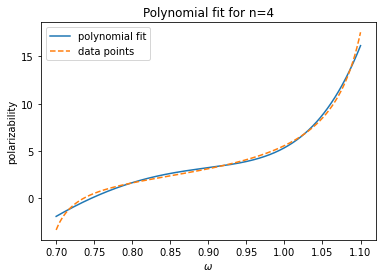

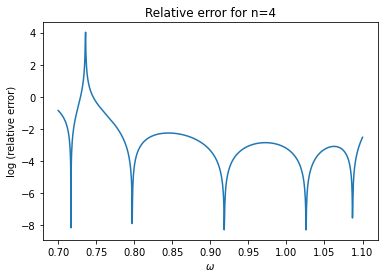

In [29]:
P4, r4, a4 = P(omega, alpha, 4)  #solve for polynomial and residual for n = 4

#plot fit and data
plt.plot(omega, P4, label="polynomial fit")
plt.plot(omega, alpha, "--", label="data points")
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Polynomial fit for n=4")
plt.legend()

rel_error4 = np.log(np.abs((P4-alpha)/alpha))  #calculate log(relative error)
mean_rel_error4 = np.mean(rel_error4)  #calculate the mean value of log(relative error)

#plot log(relative error)
plt.figure()
plt.plot(omega, rel_error4)
plt.xlabel("$\omega$")
plt.ylabel("log (relative error)")
plt.title("Relative error for n=4")

print("coefficients =", np.round(a4, 2))  #print coefficients of fit
print("mean(log(relative error)) =", mean_rel_error4)  #print the mean value of log(relative error)
print("residual =", np.round(r4, 3))  #print residual

coefficients = [ -491.53  3090.12 -7774.06  9866.05 -6430.7   1873.79  -128.1 ]
mean(log(relative error)) = -4.011916911615588
residual = 2.959


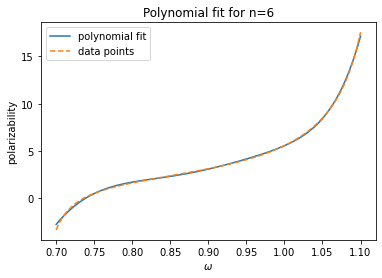

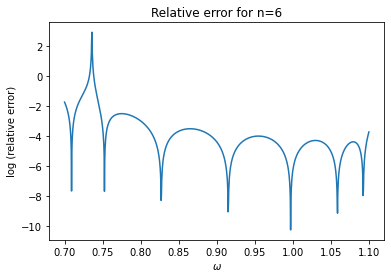

In [30]:
P6, r6, a6 = P(omega, alpha, 6)  #solve for polynomial and residual for n = 6

#plot fit and data
plt.plot(omega, P6, label="polynomial fit")
plt.plot(omega, alpha, "--", label="data points")
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Polynomial fit for n=6")
plt.legend()

rel_error6 = np.log(np.abs((P6-alpha)/alpha))  #calculate log(relative error)
mean_rel_error6 = np.mean(rel_error6)  #calculate the mean value of log(relative error)

#plot log(relative error)
plt.figure()
plt.plot(omega, rel_error6)
plt.xlabel("$\omega$")
plt.ylabel("log (relative error)")
plt.title("Relative error for n=6")

print("coefficients =", np.round(a6, 2))  #print coefficients of fit
print("mean(log(relative error)) =", mean_rel_error6)  #print the mean value of log(relative error)
print("residual =", np.round(r6,3))  #print residual

# Problem h

## 2)

In [31]:
N = 1000  #number of frequency points
omega_new = np.linspace(0.7, 1.5, N)  #array of N evenly spaced values of omega from 0.7 to 1.5

alpha_new = alpha_array(omega_new)  #calculate array of polarizabilities


def Q(freq, alpha, n):
    """This function takes an array of frequencies, an array of polarizabilities and the parameter n which is related to the number of terms in the rational function and creates a linear least squares fit to the rational function Q. The function returns the rational function, the residual of the fit and arrays with the coefficients a_j and b_j."""
    
    A = np.zeros((N, 2*n+1))  #initialize matrix of the linear system
    
    for i in range(n+1):  #create the first n+1 columns in A
        A[:,i] = freq**i
    
    for i in range(1, n+1):  #create the last n columns in A
        A[:,i+n] = - alpha * freq**i

    c, r = least_squares(A, alpha)  #perform linear least squares fit
    
    a_j = c[:n+1]  #the first n+1 entries in c are the a-coefficients
    b_j = c[n+1:]  #the last n entries in c are the b-coefficients

    numerator = 0  #initialize numerator in rational function
    for i in range(n+1):  #calculate numerator in rational function
        numerator = numerator + a_j[i] * freq**i
    
    denominator = 1  #initialize denominator in rational function
    for i in range(n):  #calculate denominator in rational function
        denominator = denominator + b_j[i] * freq**(i+1)
        
    Q = numerator / denominator  #create rational function
        
    return Q, r, a_j, b_j

a_j = [ 1.928 -3.453  1.144]
b_j = [-2.394  1.327]
mean(log(relative error)) = -3.969735537905016
residual = 0.377


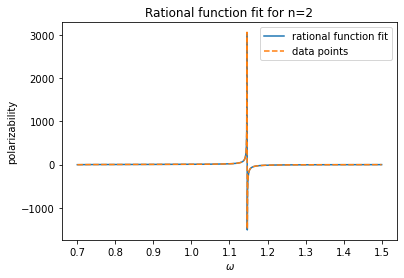

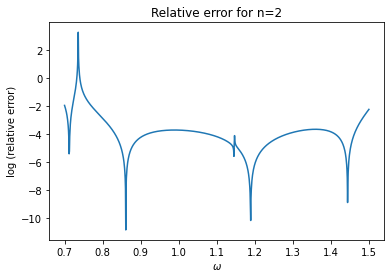

In [32]:
Q2, r2_new, a2_new, b2_new = Q(omega_new, alpha_new, 2)  #solve for rational function and residual for n = 2

#plot fit and data
plt.plot(omega_new, Q2, label="rational function fit")
plt.plot(omega_new, alpha_new, "--", label="data points")
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Rational function fit for n=2")
plt.legend()

rel_error2_new = np.log(np.abs((Q2-alpha_new)/alpha_new))  #calculate log(relative error)
mean_rel_error2_new = np.mean(rel_error2_new)  #calculate the mean value of log(relative error)

#plot log(relative error)
plt.figure()
plt.plot(omega_new, rel_error2_new)
plt.xlabel("$\omega$")
plt.ylabel("log (relative error)")
plt.title("Relative error for n=2")

print("a_j =", np.round(a2_new, 3))  #print a_j coefficients of fit
print("b_j =", np.round(b2_new, 3))  #print b_j coefficients of fit
print("mean(log(relative error)) =", mean_rel_error2_new)  #print the mean value of log(relative error)
print("residual =", np.round(r2_new, 3))  #print residual

a_j = [ 1.972 -3.894  1.614  0.055 -0.009]
b_j = [-2.    -0.171  1.921 -0.798]
mean(log(relative error)) = -15.906144211126486
residual = 1.02e-06


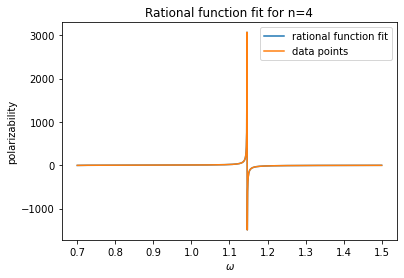

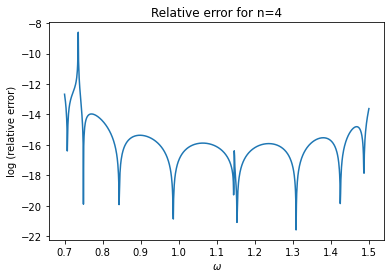

In [33]:
Q4, r4_new, a4_new, b4_new = Q(omega_new, alpha_new, 4)  #solve for rational function and residual for n = 2

#plot fit and data
plt.plot(omega_new, Q4, label="rational function fit")
plt.plot(omega_new, alpha_new, label="data points")
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Rational function fit for n=4")
plt.legend()

rel_error4_new = np.log(np.abs((Q4-alpha_new)/alpha_new))  #calculate log(relative error)
mean_rel_error4_new = np.mean(rel_error4_new)  #calculate the mean value of log(relative error)

#plot log(relative error)
plt.figure()
plt.plot(omega_new, rel_error4_new)
plt.xlabel("$\omega$")
plt.ylabel("log (relative error)")

plt.title("Relative error for n=4")

print("a_j =", np.round(a4_new, 3))  #print a_j coefficients of fit
print("b_j =", np.round(b4_new, 3))  #print b_j coefficients of fit
print("mean(log(relative error)) =", mean_rel_error4_new)  #print the mean value of log(relative error)
print("residual =", np.round(r4_new,8))  #print residual

## 3)

Text(0.5, 1.0, 'Polarizability as a function of frequency')

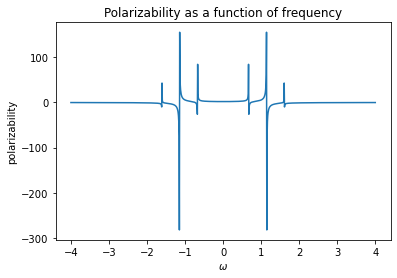

In [34]:
N = 1000  #number of frequency points

omega_long = np.linspace(-4, 4, N)  #array of N evenly spaced values of omega from -4 to 4

alpha_long = alpha_array(omega_long)  #calculate polarizabilities

#plot polarizability as a function of frequency in the long interval
plt.plot(omega_long, alpha_long)
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Polarizability as a function of frequency")

In [35]:
def Q_even(freq, alpha, n):
    """This function takes an array of frequencies, an array of polarizabilities and the parameter n which is related to the number of terms in the even rational function and creates a linear least squares fit to the even rational function Q. The function returns the even rational function, the residual of the fit and arrays with the coefficients a_j and b_j."""
    
    A = np.zeros((N, 2*n+1))  #initialize matrix of the linear system
    
    for i in range(n+1):  #create the first n+1 columns in A
        A[:,i] = freq**(2*i)
    
    for i in range(1, n+1):  #create the last n columns in A
        A[:,i+n] = - alpha * freq**(2*i)

    c, r = least_squares(A, alpha)  #perform linear least squares fit
    
    a_j = c[:n+1]  #the first n+1 entries in c are the a-coefficients
    b_j = c[n+1:]  #the last n entries in c are the b-coefficients

    numerator = 0  #initialize numerator in rational function
    for i in range(n+1):  #calculate numerator in rational function
        numerator = numerator + a_j[i] * freq**(2*i)
    
    denominator = 1  #initialize denominator in rational function
    for i in range(n):  #calculate denominator in rational function
        denominator = denominator + b_j[i] * freq**(2*(i+1))
        
    Q = numerator / denominator  #create rational function
        
    return Q, r, a_j, b_j

a_j = [ 1.998e+00 -4.497e+00  1.497e+00 -3.000e-03]
b_j = [-3.37   2.847 -0.655]
mean(log(relative error)) = -6.724549634433038
residual = 0.501187


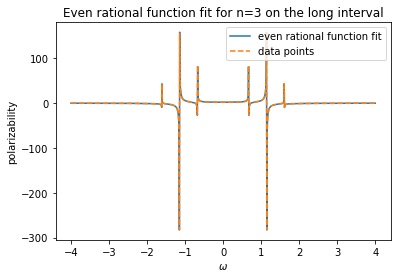

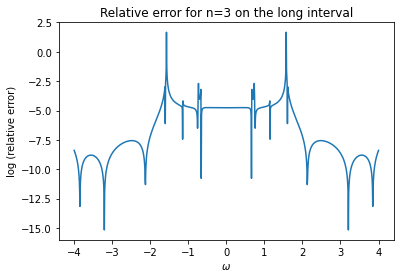

In [36]:
Q_long, r_long, a_long, b_long = Q_even(omega_long, alpha_long, 3)  #solve for even rational function and residual on the long interval

#plot fit and data
plt.plot(omega_long, Q_long, label="even rational function fit")
plt.plot(omega_long, alpha_long, "--", label="data points")
plt.xlabel("$\omega$")
plt.ylabel("polarizability")
plt.title("Even rational function fit for n=3 on the long interval")
plt.legend()

rel_error_long = np.log(np.abs((Q_long-alpha_long)/alpha_long))  #calculate log(relative error)
mean_rel_error_long = np.mean(rel_error_long)  #calculate the mean value of log(relative error)

#plot log(relative error)
plt.figure()
plt.plot(omega_long, rel_error_long)
plt.xlabel("$\omega$")
plt.ylabel("log (relative error)")
plt.title("Relative error for n=3 on the long interval")

print("a_j =", np.round(a_long, 3))  #print a_j coefficients of fit
print("b_j =", np.round(b_long, 3))  #print b_j coefficients of fit
print("mean(log(relative error)) =", mean_rel_error_long)  #print the mean value of log(relative error)
print("residual =", np.round(r_long, 6))  #print residual